# Conjugation workflow - protocol using the Opentron  

In [1]:
from python_scripts.info_widgets import create_dropdown_conj, save_conjugation
from python_scripts.conjugation_submit import display_form
from python_scripts.runner_conjugation import ConjugationRunner 
from python_scripts.deck_design import display_deck_design, display_96well_plate_design, display_15ml_falcon_rack, display_50ml_falcon_rack
from python_scripts.conjugation_consumables import conjugation_consumables

The complete workflow for the conjugation using the Opentron is as following:

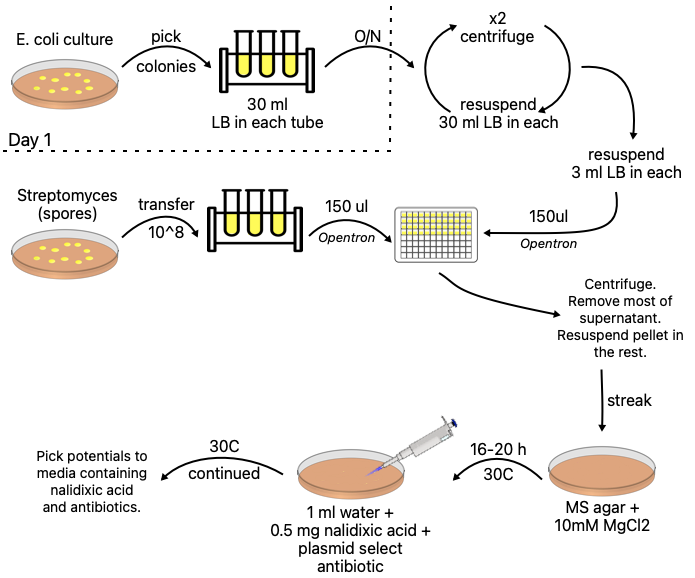

##### To perform a succesful transformation by use of the Opentrons the following items are necessary:

- Competent *E. coli* cells with plasmid (up to 16)
- Streptomyces (up to 30)
- 96 deepwell plate (up to 2)
- Rack for six 50mL tubes (up to 3) 
- 12-well deepwell plate (up to 2)
- 300 ul tips (up to 2)
- 1000 ul tips

Using a 96-well plate for end-result allows for an easy mix of up to 96 combinations where the robot will do the following pattern:

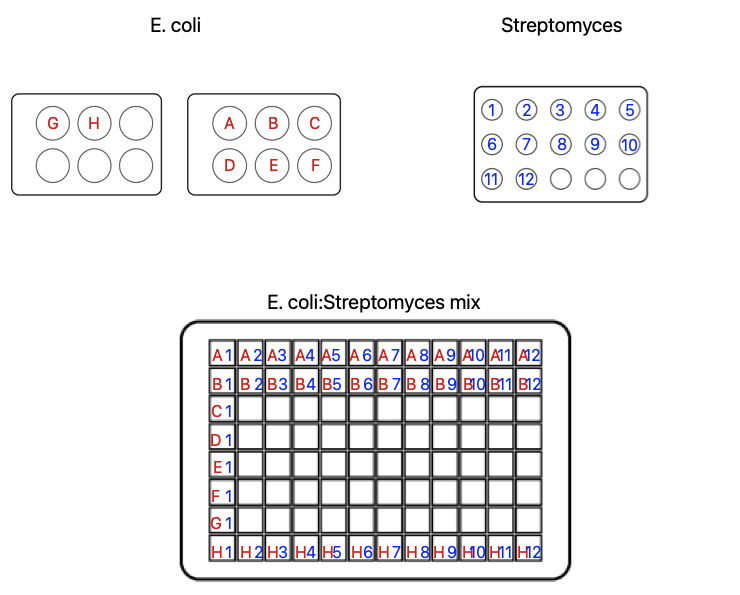

Depending on how many combinations of plasmids and Streptomyces you want to test, the number of each item varies. The same goes for the pattern on the 96-well plates. For instance, if you would have two E. coli strains, A and B, and wanted to test A with four different streptomyces, but test B with 6 streptomyces, it would look like this:

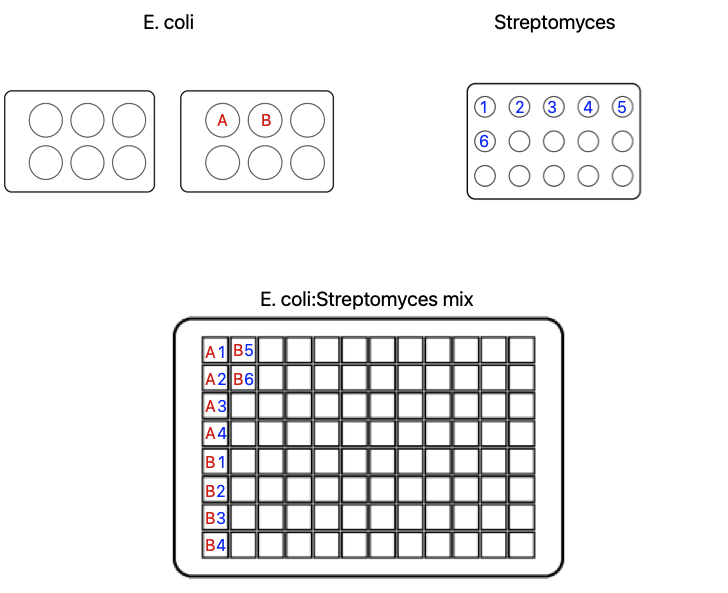

### Readability - what are the names of your plasmids as well as your Streptomyces strains?

In [2]:
ecoli_list, streptomyces_list = save_conjugation()

In [3]:
ecoli, streptomyces = ecoli_list.value.replace("\r", "").split("\n"), streptomyces_list.value.replace("\r", "").split("\n")
conjugation_mix, ecoli_tubes = display_form(ecoli, streptomyces)

## 1. step - growing the *E. coli* and Streptomyces in plates


For this the steps needed to be done manually are:

1. Growth of Streptomyces lawn(s)
2. Creation of O/N transformed E. coli cultures
3. Centrifugation and resuspension of E. coli 2x in LB before resuspending it in 0.1x volume LB
4. Transfer of Streptomyces spores from lawn(s) to 15 mL Falcon tubes

## 2. step - mixing of competent *E. coli* cells with Streptomyces

For this step the only manual step is the placing of tips, racks of tubes and plates. 


### For the setup on the Opentron, this will look like the following diagram:

In [4]:
fill_ins = conjugation_consumables(conjugation_mix,ecoli_tubes)
display_deck_design(fill_ins)

### Rack design of 15ml tube racks with Streptomyces:

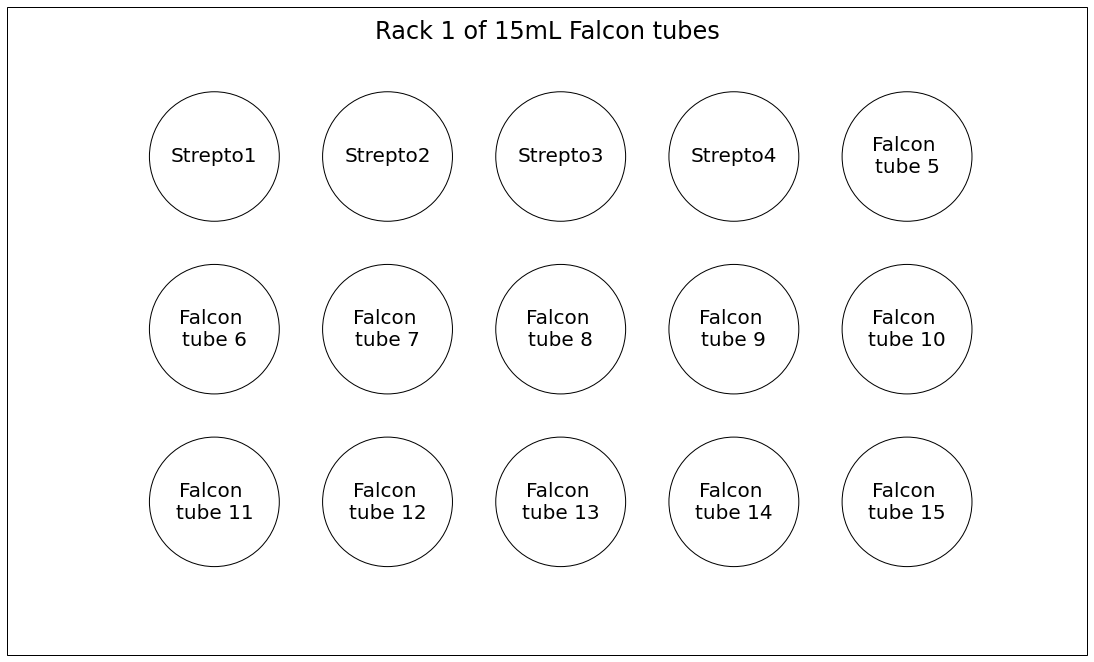

In [5]:
#Lav input fra display_form (det nedenunder er en tester)
strepto_tubes = ["Strepto1", "Strepto2", "Strepto3", "Strepto4"]
display_15ml_falcon_rack(strepto_tubes)

### Rack design of 50ml tube racks with E. coli:

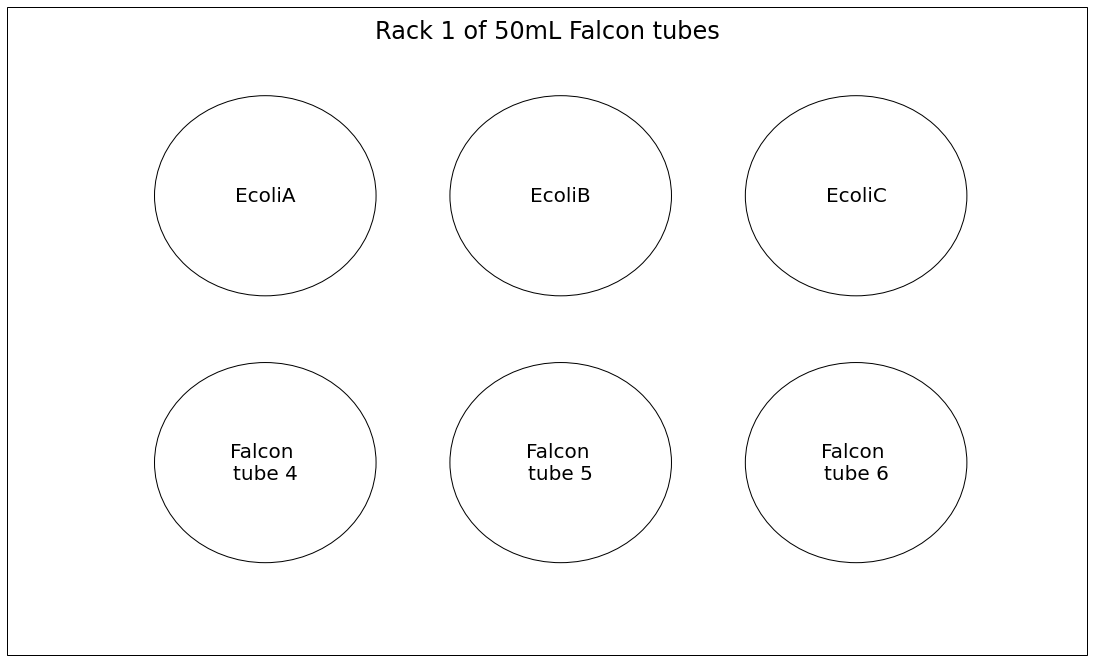

In [6]:
#Her skal der være design for 50ml racks så de sætter dem rigtigt i holder ift design
display_50ml_falcon_rack(ecoli_tubes)

### For the final product, the 96-well plate(s) will look as following:

In [ ]:
#Skal kunne modtage færdige pladedesign fra display_form - det er strlisten af alle kombinationer
#Skal kunne vise to plader hvis det er nødvendigt
plate_fill_ins = {"EcoliA::<br>strept1": [0],
                "EcoliA::<br>strept2": [1],
                "EcoliB::<br>strept1": [2],
                "EcoliB::<br>strept3": [3],
                "EcoliC::<br>strept4": [4]}
display_96well_plate_design(plate_fill_ins)

This plate design will also be saved in a separate file from the runlog of the experiment.

Initiate the robot when all plates and boxes have been placed on the appropriate deck spots.
### Initiate the robot - mixing:

In [ ]:
## insures that robot is correctly initialized - Without this the robot will prioritize its own GUI
!systemctl stop opentrons-robot-server

In [ ]:
#Importing the Python script and preparing the dynamic variables for the run
script = ConjugationRunner.get_script()

#Using the numbers provided by the user
script.ecoli_uses = conjugation_mix
script.ecoli_tubes = ecoli_tubes

In [ ]:
# Import opentrons.execute
import opentrons.execute

protocol = opentrons.execute.get_protocol_api('2.4')

In [ ]:
# It is important to always home before and after the run of a script
runner = ConjugationRunner()

#protocol.home()

#script.run(protocol)
    
#protocol.home()

runner.finished()

In [ ]:
try:
    runner.display_form(ecoli=ecoli, streptomyces=streptomyces, 
                        conjugation_mix = conjugation_mix,
                        ecoli_tubes = ecoli_tubes)
    
except Exception as error:
    print(error)    

## 3. step - centrifugation and preparation for plating

For the next step you will have to centrifuge the finished 96 well plates and afterwards place the plates on the Opentrons again to remove most, not all, of the supernatant before the it can slowly mix it with the pellet.

when you are ready to initiate the next script, place the plates on the decks as illustrated below. Notice, that since this part of the script only needs 1 tip box for 1 mix plate, it is possible to fill the deck with runs from more than 1 robot from step 2.

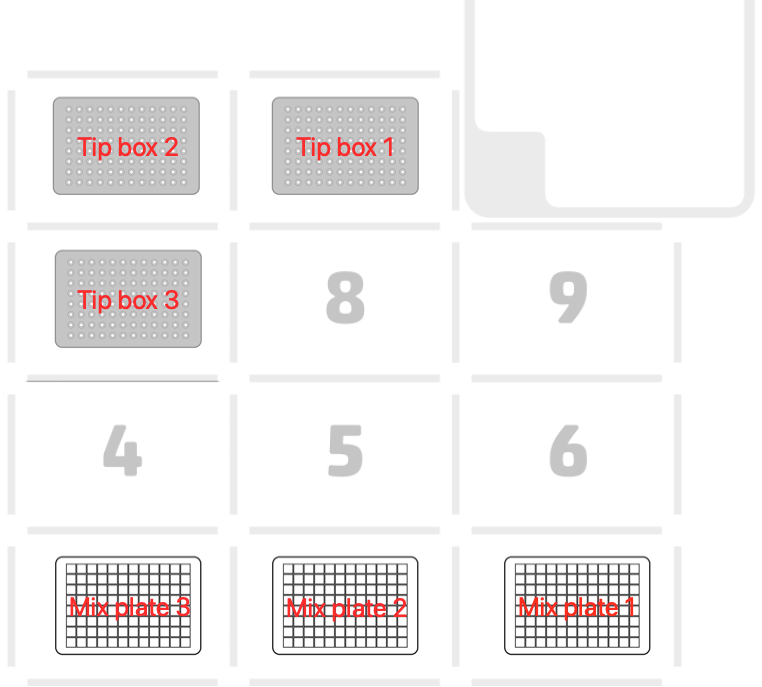

### Initiate the robot - removal of supernatant

In [ ]:
## insures that robot is correctly initialized - Without this the robot will prioritize its own GUI
!systemctl stop opentrons-robot-server


In [ ]:
#Importing the Python script and preparing the dynamic variables for the run
import supernatant_removal_pelletmix as script

In [ ]:
# Import opentrons.execute
import opentrons.execute

protocol = opentrons.execute.get_protocol_api('2.4')

In [ ]:
protocol.home()

script.run(protocol)

protocol.home()

You have now succesfully run the transformation step on the Opentrons and can spread the mix on selection plates for O/N incubation at 37 degrees Celsius.